In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
df = pd.read_csv('adult.csv')
df.replace('?', 'Unknown', inplace = True)
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [7]:
cat = [var for var in df.columns if df[var].dtype == 'O']
num = [var for var in df.columns if df[var].dtype != 'O']
total = []
for col in df[cat]:
    print(f'There are {df[col].nunique()} categories in', col)
    total.append(df[col].nunique())
print(f"There's a total of {pd.Series(total).sum()} categories in the whole data frame")
print(f'There are {len(cat)} categorical variables')
print(f'There are {len(num)} numerical variables')
print(f'The total number of variables is {df.shape[1]}')

There are 9 categories in workclass
There are 16 categories in education
There are 7 categories in marital.status
There are 15 categories in occupation
There are 6 categories in relationship
There are 5 categories in race
There are 2 categories in sex
There are 42 categories in native.country
There are 2 categories in income
There's a total of 104 categories in the whole data frame
There are 9 categorical variables
There are 6 numerical variables
The total number of variables is 15


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

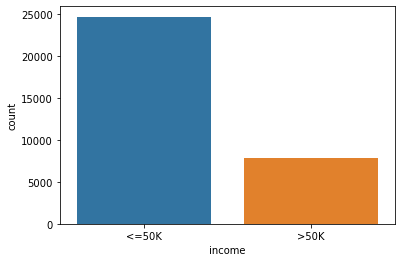

In [12]:
sns.countplot(x= df['income'])
plt.show()

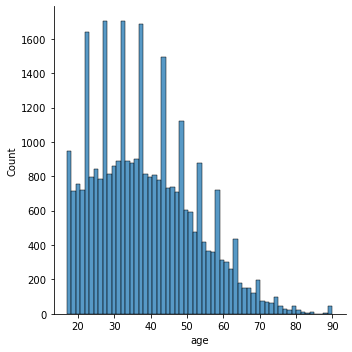

In [14]:
sns.displot(x= df['age'],)
plt.show()

<AxesSubplot:xlabel='count', ylabel='occupation'>

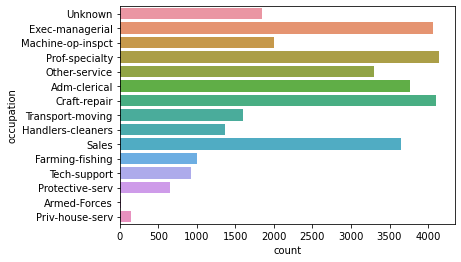

In [16]:
sns.countplot(y = df['occupation'])

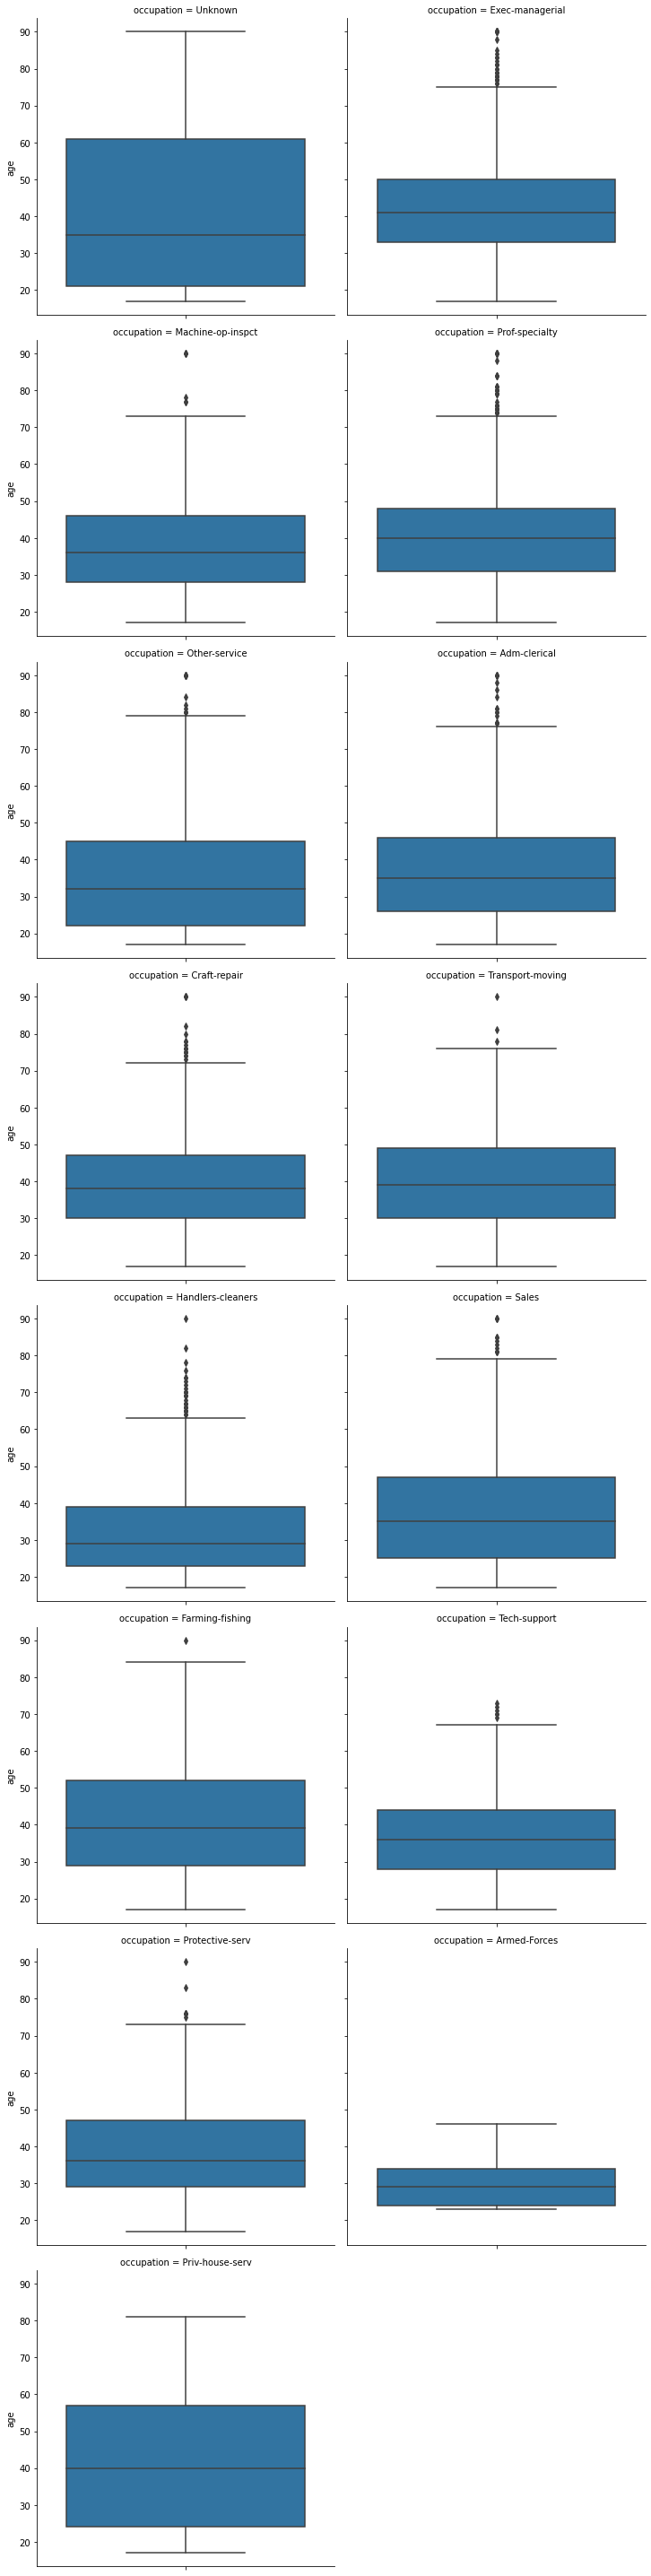

In [25]:
sns.catplot( y = 'age', data = df, col='occupation',col_wrap=2, kind= 'box') 

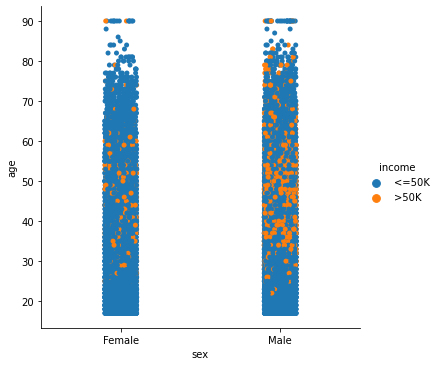

In [27]:
sns.catplot(x = 'sex', y='age', data = df, hue='income')

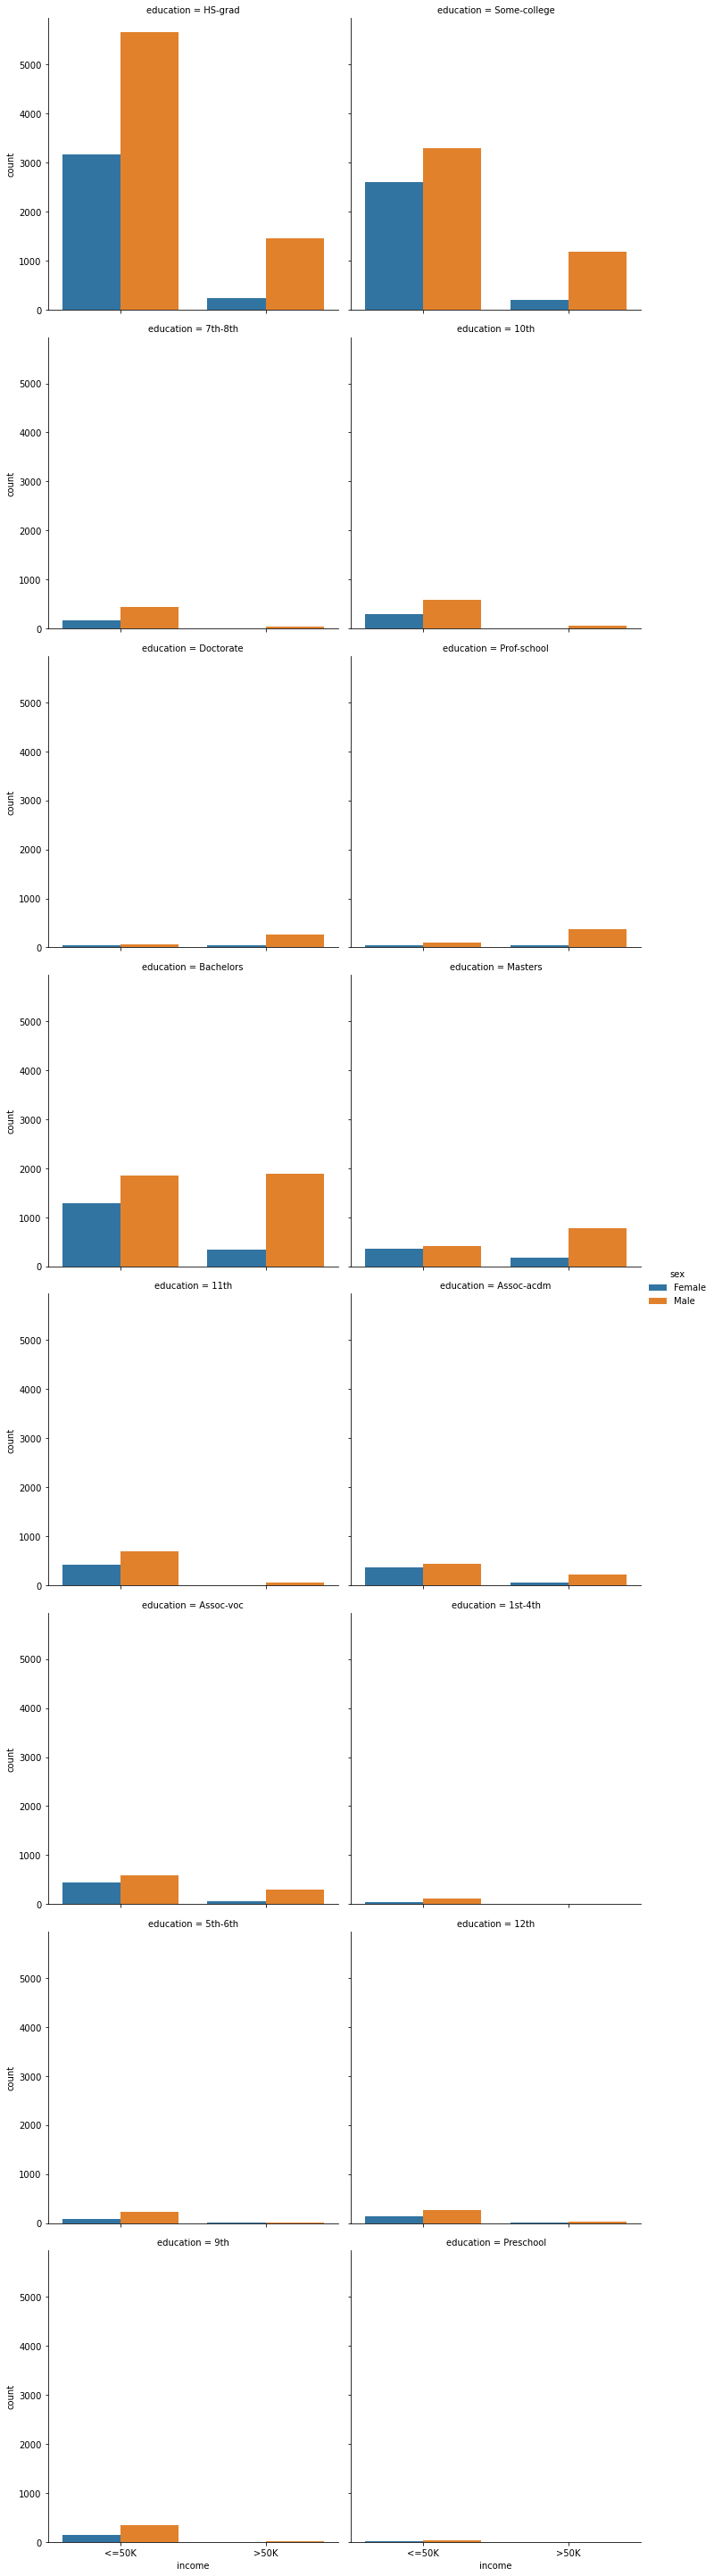

In [34]:
sns.catplot(x='income', kind='count', hue= 'sex', data = df, col='education', col_wrap=2)

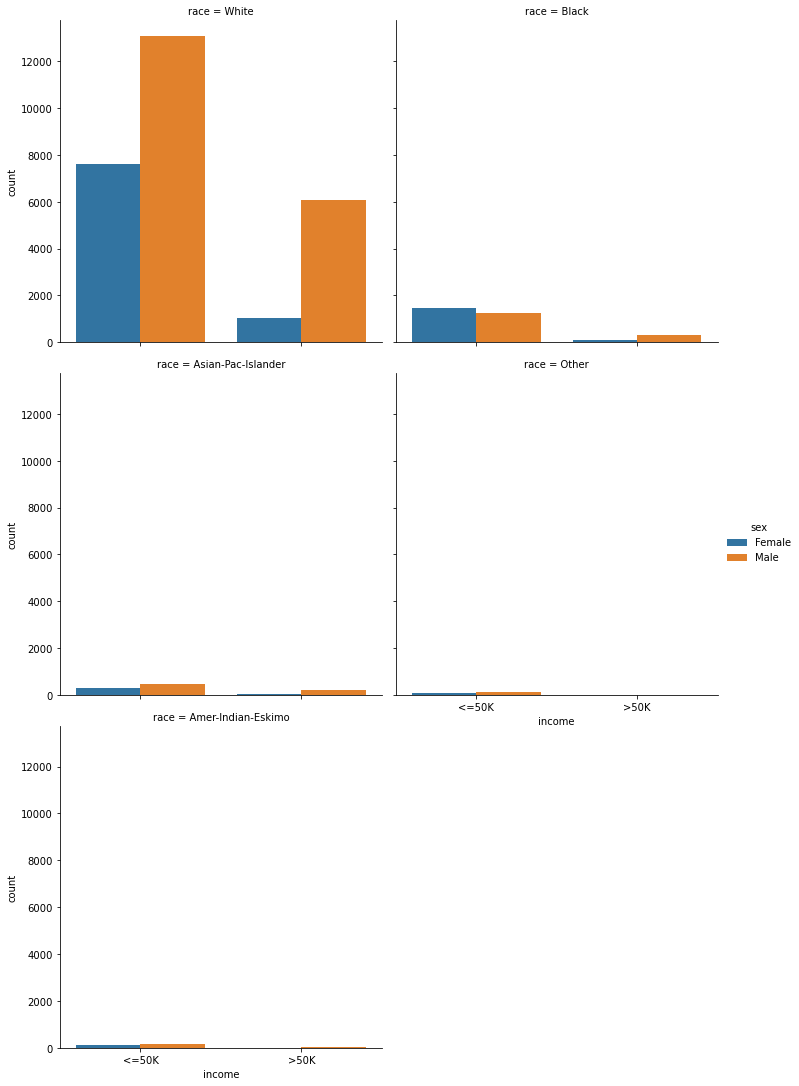

In [36]:
sns.catplot(x='income', kind='count', data = df, col='race', col_wrap=2, hue= 'sex')

In [62]:
df_occupation = df.groupby('occupation')['income'].value_counts()
df_occupation.head()

occupation    income
Adm-clerical  <=50K     3263
              >50K       507
Armed-Forces  <=50K        8
              >50K         1
Craft-repair  <=50K     3170
Name: income, dtype: int64

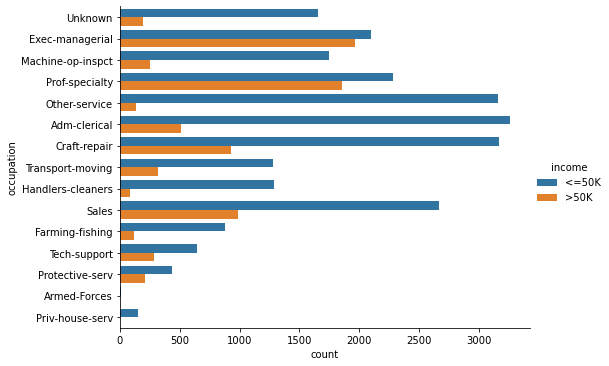

In [70]:
sns.catplot(y='occupation', hue='income', data= df, kind='count',aspect=1.5)

In [71]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [72]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

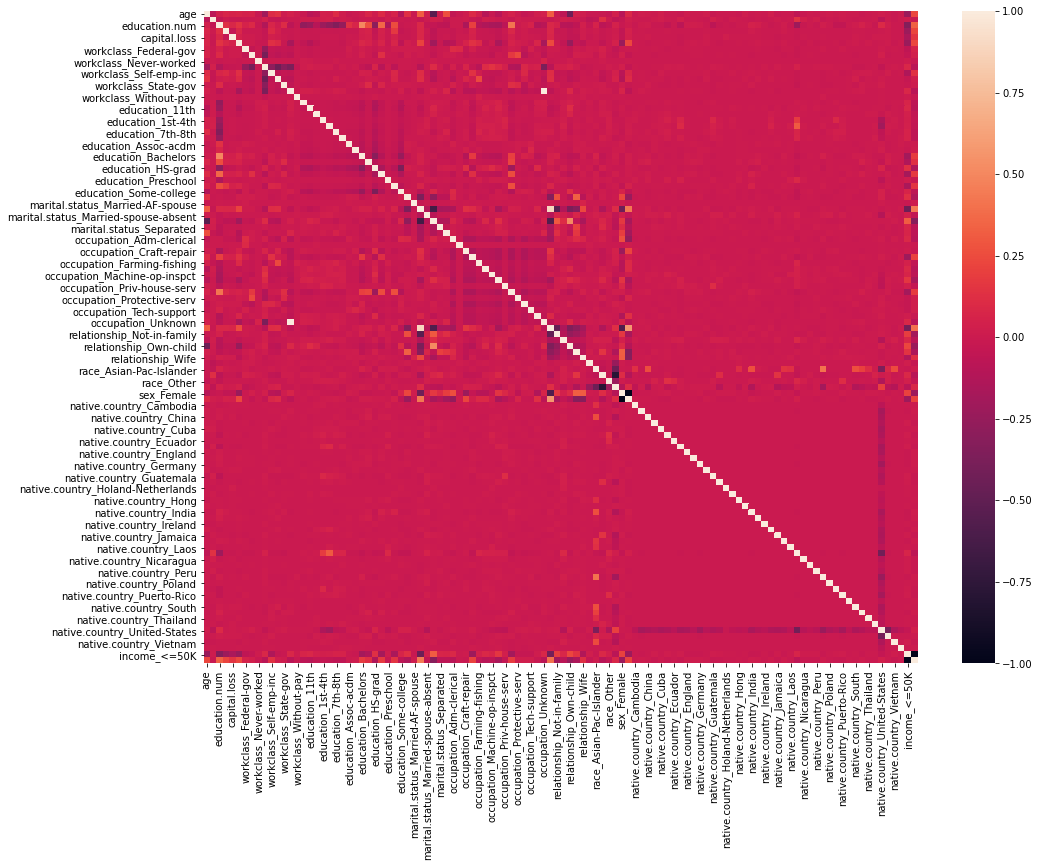

In [77]:
plt.figure(figsize=(16,12))
sns.heatmap(pd.get_dummies(df).corr())

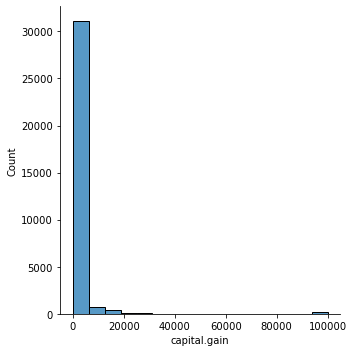

In [99]:
sns.displot(x=df['capital.gain'])

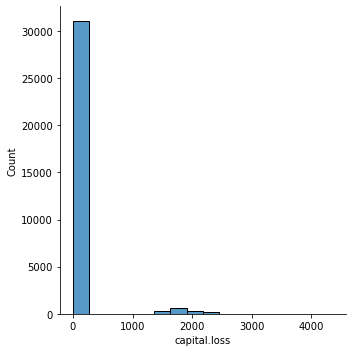

In [81]:
sns.displot(x=df['capital.loss'])

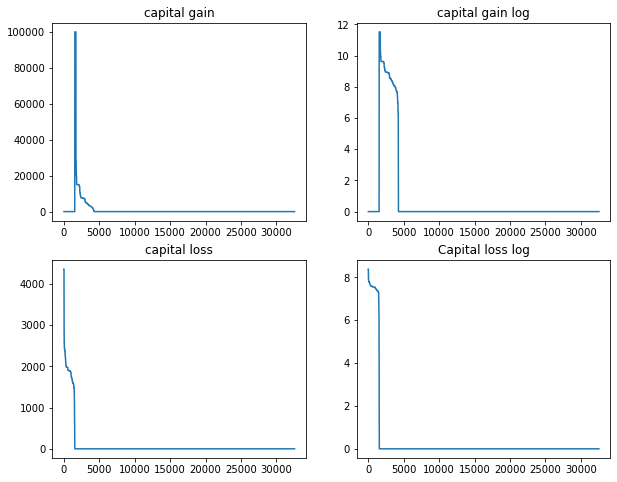

In [96]:
fig,a =  plt.subplots(2,2,figsize=(10,8))
a[0][0].plot(df['capital.gain'])
a[0][0].set_title('capital gain')
a[0][1].plot(np.log1p(df['capital.gain']))
a[0][1].set_title('capital gain log')
a[1][0].plot(df['capital.loss'])
a[1][0].set_title('capital loss')
a[1][1].plot(np.log1p(df['capital.loss']))
a[1][1].set_title('Capital loss log')
plt.show()

In [97]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

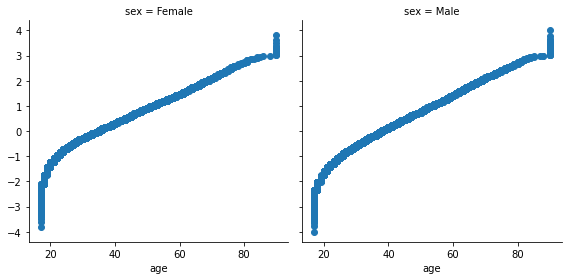

In [98]:
g = sns.FacetGrid(df, col="sex", height=4)
g.map(quantile_plot, "age")